In [ ]:
!pip install -U ipykernel
!pip install -q streamlit
!pip install pyngrok

     |████████████████████████████████| 131 kB 8.6 MB/s 
     |████████████████████████████████| 428 kB 41.8 MB/s 
     |████████████████████████████████| 793 kB 34.9 MB/s 
     |████████████████████████████████| 130 kB 30.9 MB/s 
     |████████████████████████████████| 381 kB 47.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipyk

     |████████████████████████████████| 10.1 MB 5.5 MB/s 
     |████████████████████████████████| 181 kB 40.4 MB/s 
     |████████████████████████████████| 4.3 MB 39.8 MB/s 
     |████████████████████████████████| 76 kB 2.4 MB/s 
     |████████████████████████████████| 111 kB 42.0 MB/s 
     |████████████████████████████████| 164 kB 45.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 745 kB 10.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=de0ca64aa658967cdb69857a1ae28d51bff2f5f909e58ad49d0b871c0e600c19
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken [token]

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/Brain tumor classification"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Brain tumor classification


In [ ]:
import tensorflow as tf
from PIL import Image
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib
import shutil
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import cv2
import scipy
import io

Saving no 98.jpg to no 98.jpg
User uploaded file "no 98.jpg" with length 157613 bytes
(725, 728, 3)
Chance of being a tumor: 4.52%
Identifying as No Tumor detected


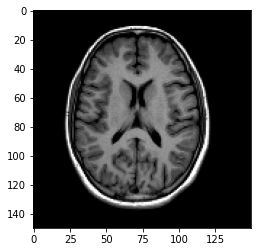

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model.h5')
from google.colab import files

url = files.upload()

for fn in url.keys():
  name=fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(url[fn])))
im = cv2.imread(f'/content/gdrive/MyDrive/Brain tumor classification/{name}',1)
im=np.array(im).astype('float32')/255

if len(im.shape)==2:
    im=tf.expand_dims(im,-1)
else:
    pass
print(im.shape)
resized_images = tf.image.resize(im, (150,150))
if resized_images.shape[2]==1:
    resized_images = tf.image.grayscale_to_rgb(resized_images, name=None)
else:
    pass
resized_images.shape
plt.imshow(resized_images)

print(f"Chance of being a tumor: {new_model.predict(tf.expand_dims(resized_images,axis=0))[0][0]:.02%}")
if (new_model.predict(tf.expand_dims(resized_images,axis=0)) > 0.65).astype("int32")[0][0]==1:
    print('Identifying as Tumor detected')
else:
    print('Identifying as No Tumor detected')

In [ ]:
%%writefile app.py

import streamlit as st
import base64
from pathlib import Path
import tensorflow as tf
from PIL import Image
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib
import shutil
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import cv2
import scipy
import os
from keras.preprocessing.image import load_img
from tempfile import NamedTemporaryFile
import io

st.set_option('deprecation.showfileUploaderEncoding', False)

st.set_page_config(
    page_title="Brain Tumor Detector",
    page_icon="🧠",
    layout="wide",
    menu_items={
         'Get Help': 'https://www.linkedin.com/in/tridib-roy-974374145/',
         'Report a bug': "https://www.linkedin.com/in/tridib-roy-974374145/",
         'About': "Portfolio WebApp"
     }
)

st.title("Brain tumor Classifier")
# st.image("https://media.giphy.com/media/3o6MbhQZGGeskpDJLi/giphy.gif")
with st.expander("Expand for details on the classification model!!"):
    st.info("__Description:__ This model classifies a CT scan image of brain as - Tumor or Non-tumor")
    st.info("__Framework / model used:__ This model uses tranfer learning with Tensorflow. Base model used - InceptionV3 \n")
    st.image("https://production-media.paperswithcode.com/methods/inceptionv3onc--oview_vjAbOfw.png")
    st.info("__Dataset used:__ It is trained on Brain MRI Images for Brain Tumor Detection from Kaggle")
    

name_cols=st.columns(2)
CT_url = st.file_uploader("Upload CT scan image of brain", type=["png","jpg","jpeg"]) 


try:
  st.image(CT_url,caption="Uploaded image")
  with st.spinner("Processing the image and loading necessary files....."):
    new_model = tf.keras.models.load_model('saved_model/my_model.h5')
    im = Image.open(CT_url)
    im = np.array(im).astype('float32')/255
    if len(im.shape)==2:
        im=tf.expand_dims(im,-1)
    else:
        pass

    im = tf.image.resize(im, (150,150))
    

    if im.shape[2]==1:
        im = tf.image.grayscale_to_rgb(tf.convert_to_tensor(im), name=None)
    else:
        pass
    

    clf=(new_model.predict(tf.expand_dims(im,axis=0)) > 0.65).astype("int32")[0][0]
    
    st.success("Processing Completed!")
    st.write("")
    st.write("")
    st.info("The model classification results are as follows:  ")
    
    st.write(f"Chance of being a tumor: {new_model.predict(tf.expand_dims(im,axis=0))[0][0]:.02%}")
    if clf==1:
        st.write('Identifying as **Tumor** detected')
    else:
        st.write('Identifying as **No Tumor** detected')

except:
  st.text("Waiting for image....")

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

In [ ]:
!streamlit run --server.port 80 app.py &> /dev/null 